# 이미지분석모델실습


- 불러온 이미지는 개와 고양이 두 종류의 동물 이미지 파일들이다.
- 고양이 이미지의 경우 파일명이 대문자로 시작한다.
- 멍멍이 이미지의 경우 파일명이 소문자로 시작한다.


이중 고양이와 멍멍이이미지를 분석하여 올바른 추론을 하여라.

## 데이터 로드

In [1]:
# 설치완료 및 이미지 데이터 다운로드
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

### 변수 설명 자세히 보기
```python
URLs.PETS?
```

In [2]:
# 이미지 다운로드 패스 확인
path

Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images')

In [3]:
# 이미지 파일 경로의 목록 확인
path.ls()

(#7393) [Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [4]:
# 지정 경로의 파일 객체 로드
files = get_image_files(path)
files

(#7390) [Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/mauro/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

## 데이터 변환

In [5]:
# 이미지 분류 함수 생성
def label_func(f):
    if f[0].isupper():
        return "cat"
    else:
        return "dog"
    
label_func("Sample")

'cat'

### 데이터로더 자세히 보기
- Basic wrapper around several `DataLoader`s with factory methods for computer vision problems

```python
ImageDataLoaders?
```


In [6]:
# <DataLoaders> 자료형으로이미지 데이터 로드
# [경로], [파일목록], [라벨목록], [리사이즈], [배치사이즈]
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224), bs=8)

# item_trms=Resize(224) : 이미지 스케일링을 위해 리사이즈
# bs=8 : CUDA Out of memory 문제를 해결 하기 위해 조정

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


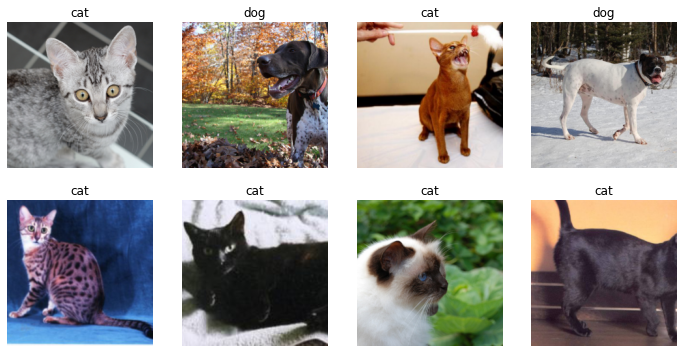

In [7]:
# 이미지 미리 보기
dls.show_batch(max_n=16)

In [29]:
#
lm(data=df, x*y)
#  lm(data=df, x~y)

SyntaxError: positional argument follows keyword argument (<ipython-input-29-ac4ddfb56ec8>, line 2)

In [8]:
# CNN 학습기 생성
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# 메모리 비워주기 작업 (필요시 사용)

- GPU 메모리 부족시(CUDA out of memory.) 배치 사이즈를 줄이거나 캐싱 메모리를 비워줌

```python
import torch
torch.cuda.empty_cache()

import gc
gc.collect()
```

In [9]:
# 학습 모델 적용
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.192613,0.031020,0.011502,03:10


epoch,train_loss,valid_loss,error_rate,time
0,0.126222,0.018408,0.006089,04:26


In [11]:
# 모델을 이용한 이미지 분석
for i in range(1, 10):
    print(learn.predict(files[i]))

('cat', TensorBase(0), TensorBase([9.9942e-01, 5.8113e-04]))


('cat', TensorBase(0), TensorBase([0.9985, 0.0015]))


('cat', TensorBase(0), TensorBase([0.9989, 0.0011]))


('cat', TensorBase(0), TensorBase([0.9981, 0.0019]))


('cat', TensorBase(0), TensorBase([9.9993e-01, 6.6556e-05]))


('cat', TensorBase(0), TensorBase([0.9519, 0.0481]))


('cat', TensorBase(0), TensorBase([0.9970, 0.0030]))


('cat', TensorBase(0), TensorBase([0.9961, 0.0039]))


('cat', TensorBase(0), TensorBase([0.9768, 0.0232]))


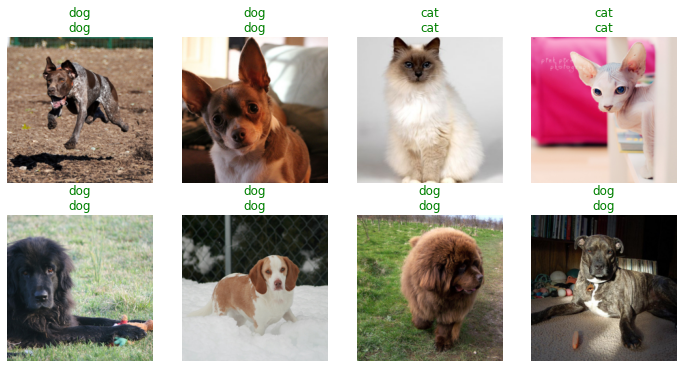

In [12]:
# 학습기가 분류한 결과 보기
learn.show_results()

## 결과분석

In [14]:
# 오분류에 대한 레포트 작성 (해석)
interp = Interpretation.from_learner(learn)

In [20]:
# 주요 오차에 대한 설명
# interp.top_losses??
interp.top_losses(16)

torch.return_types.topk(
values=TensorBase([2.3687, 1.0642, 1.0501, 1.0129, 0.9827, 0.9676, 0.9432, 0.8763, 0.8329,
        0.6845, 0.5626, 0.4144, 0.3946, 0.3915, 0.3780, 0.3780]),
indices=TensorBase([ 990, 1212,  523, 1273,  719, 1240, 1233,  482, 1208, 1123,  700, 1124,
         525,  318,  554, 1467]))

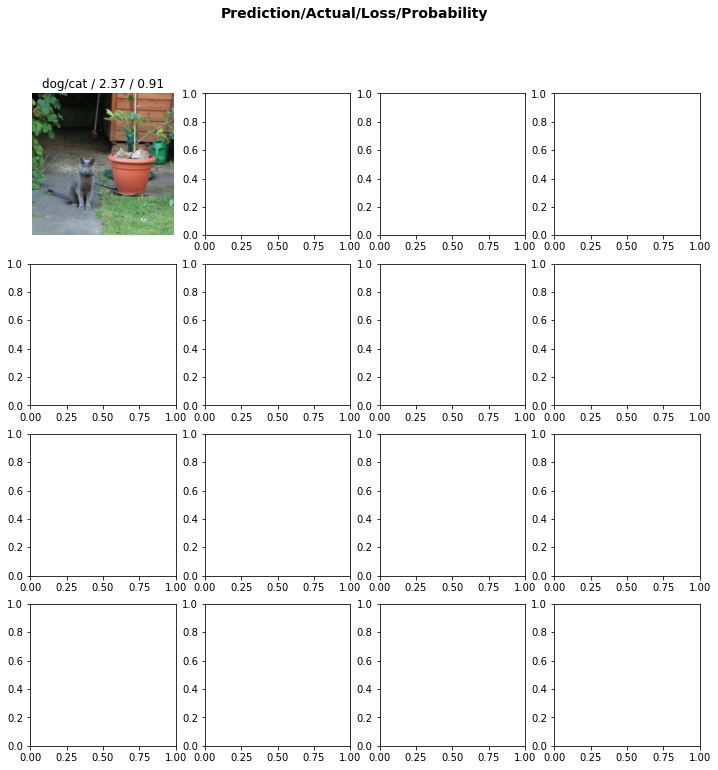

In [21]:
# 오분류 이미지 출력
# 예측 / 실제 / 벌점(가중치값) / 예측정확도
interp.plot_top_losses(16)